In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
import pandas as pd

In [2]:
filterwarnings('ignore')

In [3]:
data, target = load_digits(return_X_y=True)

In [4]:
gcv = GridSearchCV(KNeighborsClassifier(),
             {
                 'n_neighbors': list(range(1,10))
             },
             cv=10,
             return_train_score=False)

gcv.fit(data, target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [5]:
pd.DataFrame(gcv.cv_results_,columns=['param_n_neighbors','mean_test_score','rank_test_score'])

,param_n_neighbors,mean_test_score,rank_test_score
0,1,0.974963,2
1,2,0.974407,3
2,3,0.976633,1
3,4,0.972182,4
4,5,0.971074,5
5,6,0.968290,6
6,7,0.967734,7
7,8,0.964944,8
8,9,0.964944,8


In [6]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

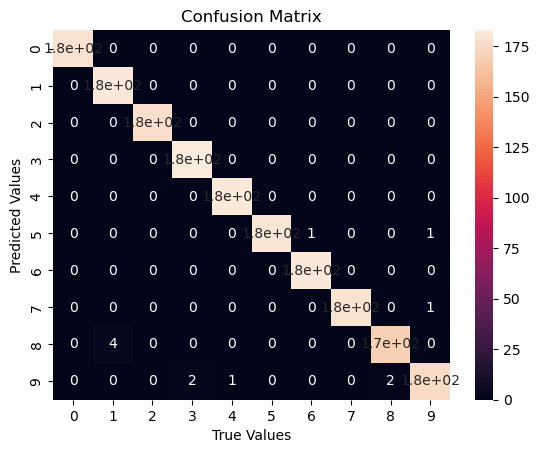

In [7]:
cm = confusion_matrix(target,gcv.best_estimator_.predict(data))
sn.heatmap(cm, annot=True)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()

In [8]:
print(classification_report(target,gcv.best_estimator_.predict(data)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.98      1.00      0.99       182
           2       1.00      1.00      1.00       177
           3       0.99      1.00      0.99       183
           4       0.99      1.00      1.00       181
           5       1.00      0.99      0.99       182
           6       0.99      1.00      1.00       181
           7       1.00      0.99      1.00       179
           8       0.99      0.98      0.98       174
           9       0.99      0.97      0.98       180

    accuracy                           0.99      1797
   macro avg       0.99      0.99      0.99      1797
weighted avg       0.99      0.99      0.99      1797

